In [ ]:
#TASK1_CODESOFT-Titanic Survival Prediction

In [ ]:
#Data Loading & Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/content/sample_data/tested.csv")
print(df.head(7))
print(df.tail(7))

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   
5          897         0       3   
6          898         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
5                    Svensson, Mr. Johan Cervin    male  14.0      0      0   
6                          Connolly, Miss. Kate  female  30.0      0      0   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   

In [4]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
(418, 12)


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [6]:
print(df["Survived"].value_counts())

0    266
1    152
Name: Survived, dtype: int64


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [9]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df['FamilySize']=df['SibSp']+df['Parch']+1


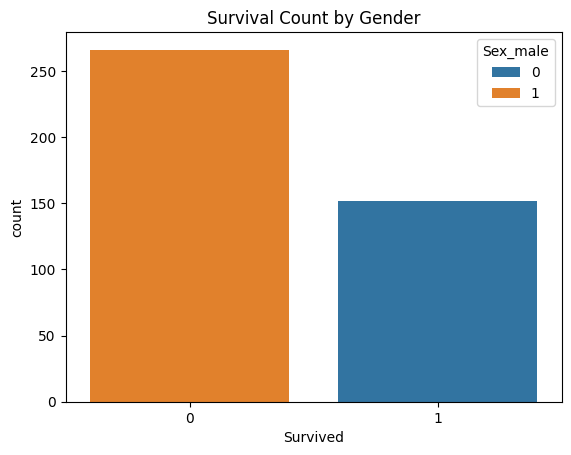

In [10]:
sns.countplot(x='Survived', hue='Sex_male', data=df)
plt.title('Survival Count by Gender')
plt.show()

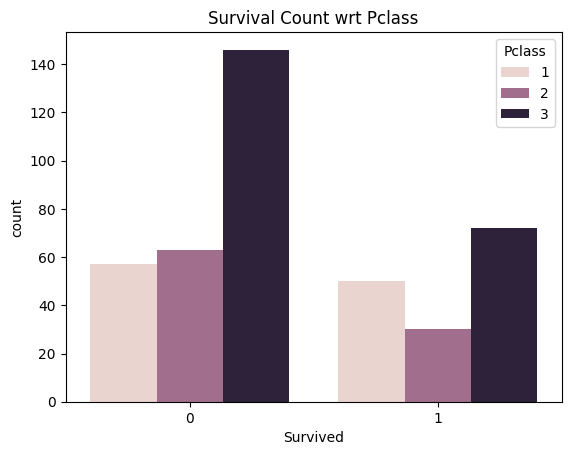

In [30]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])
plt.title('Survival Count wrt Pclass')
plt.show()

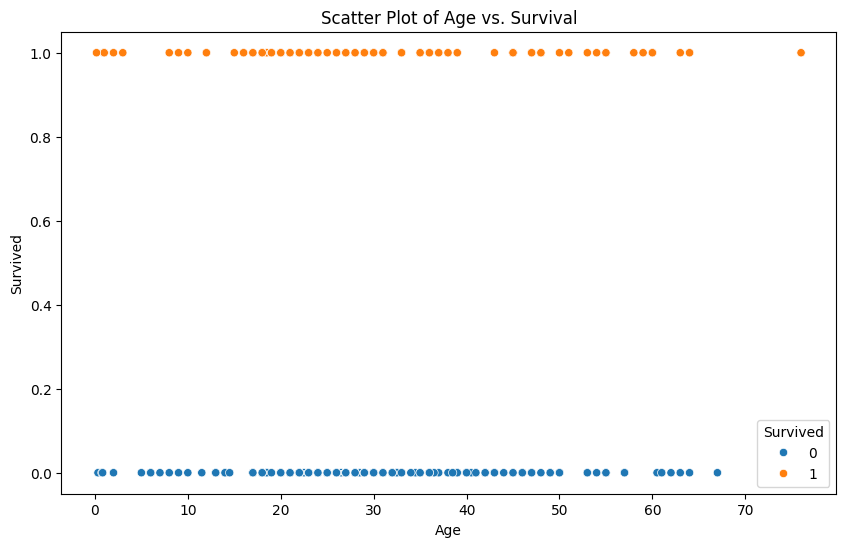

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Survived', data=df, hue='Survived')
plt.title('Scatter Plot of Age vs. Survival')
plt.show()

In [23]:
# Model training
if 'Cabin' in df.columns:
    df.drop(['Cabin'], axis=1, inplace=True)

X=df.drop(['Survived', 'Name', 'Ticket','PassengerId'], axis=1)
y=df['Survived']


In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
print(X_test)

     Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  Embarked_S  \
321     3.0  25.0    0.0    0.0    7.2292       1.0         0.0         0.0   
324     1.0  39.0    0.0    0.0  211.3375       0.0         0.0         1.0   
388     3.0  21.0    0.0    0.0    7.7500       1.0         1.0         0.0   
56      3.0  35.0    0.0    0.0    7.8958       1.0         0.0         1.0   
153     3.0  36.0    0.0    2.0   12.1833       0.0         0.0         1.0   
..      ...   ...    ...    ...       ...       ...         ...         ...   
57      3.0  25.0    0.0    0.0    7.6500       1.0         0.0         1.0   
126     3.0  22.0    0.0    0.0    7.7958       1.0         0.0         1.0   
24      1.0  48.0    1.0    3.0  262.3750       0.0         0.0         0.0   
17      3.0  21.0    0.0    0.0    7.2250       1.0         0.0         0.0   
66      3.0  18.0    0.0    0.0    7.8792       0.0         1.0         0.0   

     FamilySize  
321         1.0  
324         1.0

In [27]:
print(y_test)

321    0
324    1
388    0
56     0
153    1
      ..
57     0
126    0
24     1
17     0
66     1
Name: Survived, Length: 84, dtype: int64


In [26]:
#Model Evaluation
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

